In [1]:
%matplotlib_svg
import numpy as np
from matplotlib import pyplot as plt

## 坐标变换和注释

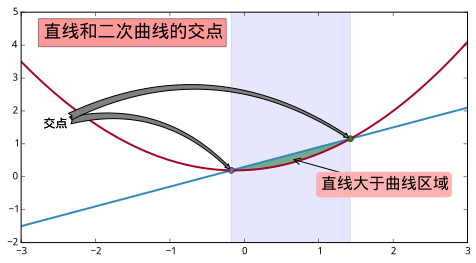

In [2]:
#%fig=为图表添加各种注释元素
def func1(x): #❶
    return 0.6*x + 0.3

def func2(x): #❶
    return 0.4*x*x + 0.1*x + 0.2
    
def find_curve_intersects(x, y1, y2):
    d = y1 - y2
    idx = np.where(d[:-1]*d[1:]<=0)[0]
    x1, x2 = x[idx], x[idx+1]
    d1, d2 = d[idx], d[idx+1]
    return -d1*(x2-x1)/(d2-d1) + x1

x = np.linspace(-3,3,100) #❷
f1 = func1(x)
f2 = func2(x)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f1)
ax.plot(x, f2)

x1, x2 = find_curve_intersects(x, f1, f2) #❸
ax.plot(x1, func1(x1), "o") 
ax.plot(x2, func1(x2), "o")

ax.fill_between(x, f1, f2, where=f1>f2, facecolor="green", alpha=0.5) #❹

from matplotlib import transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1) #❺

a = ax.text(0.05, 0.95, "直线和二次曲线的交点",  #❻
    transform=ax.transAxes,
    verticalalignment = "top",
    fontsize = 18,
    bbox={"facecolor":"red","alpha":0.4,"pad":10}
)

arrow = {"arrowstyle":"fancy,tail_width=0.6", 
         "facecolor":"gray", 
         "connectionstyle":"arc3,rad=-0.3"}

ax.annotate("交点", #❼
    xy=(x1, func1(x1)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)
                  
ax.annotate("交点", #❼
    xy=(x2, func1(x2)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)

xm = (x1+x2)/2
ym = (func1(xm) - func2(xm))/2+func2(xm)
o = ax.annotate("直线大于曲线区域", #❼
    xy =(xm, ym), xycoords="data",
    xytext = (30, -30), textcoords="offset points",    
    bbox={"boxstyle":"round", "facecolor":(1.0, 0.7, 0.7), "edgecolor":"none"},
    fontsize=16,
    arrowprops={"arrowstyle":"->"}
)

### 四种坐标系

In [3]:
print((type(ax.transData)))
ax.transData.transform([(-3,-2), (3,5)])

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([[  80.,   32.],
       [ 576.,  288.]])

In [4]:
ax.transAxes.transform([(0,0), (1,1)])

array([[  80.,   32.],
       [ 576.,  288.]])

In [5]:
fig.transFigure.transform([(0,0), (1,1)])

array([[   0.,    0.],
       [ 640.,  320.]])

In [7]:
inv = ax.transData.inverted()
print((type(inv)))
inv.transform((320, 160))

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([-0.09677419,  1.5       ])

In [8]:
print((ax.set_xlim(-3, 2))) # 设置X轴的范围为-3到2
print((ax.transData.transform((3, 5)))) # 数据坐标变换对象已经发生了变化

(-3, 2)
[ 675.2  288. ]


> **TIP**

> 使用`axvspan()`和`axhspan()`可以快速绘制垂直方向和水平方向上的区间。

### 坐标变换的流水线

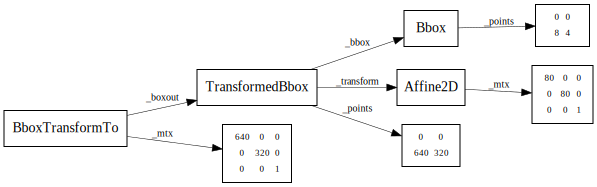

In [10]:
#%fig=图表坐标变换对象的内部结构
from scpy2.common import GraphvizMPLTransform
%dot GraphvizMPLTransform.graphviz(fig.transFigure)

In [11]:
fig.dpi_scale_trans == fig.transFigure._boxout._transform

True

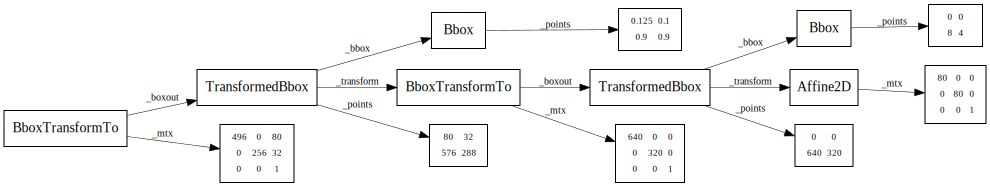

In [12]:
#%fig=子图坐标变换对象的内部结构
%dot GraphvizMPLTransform.graphviz(ax.transAxes)

In [13]:
ax.transAxes._boxout._transform == fig.transFigure

True

In [14]:
ax.get_position()

Bbox('array([[ 0.125,  0.1  ],\n       [ 0.9  ,  0.9  ]])')

In [15]:
ax.transAxes._boxout.bounds

(80.0, 31.999999999999993, 496.0, 256.0)

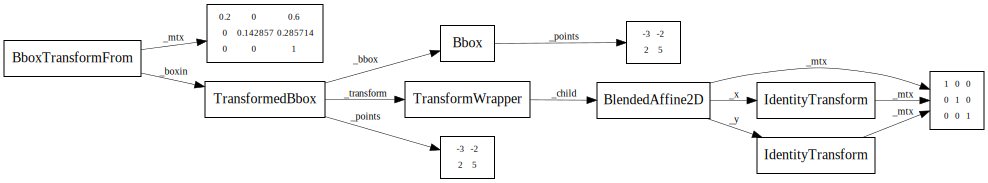

In [16]:
#%fig=数据坐标变换对象的内部结构
%dot GraphvizMPLTransform.graphviz(ax.transLimits)

In [17]:
print((ax.transLimits.transform((-3, -2))))
print((ax.transLimits.transform((2, 5))))

[ 0.  0.]
[ 1.2  1. ]


In [18]:
print((ax.get_xlim())) # 获得X轴的显示范围
print((ax.get_ylim())) # 获得Y轴的显示范围

(-3.0, 2.0)
(-2.0, 5.0)


In [101]:
t = ax.transLimits + ax.transAxes
print((t.transform((0,0))))
print((ax.transData.transform((0,0))))

[ 377.6         105.14285714]
[ 377.6         105.14285714]


In [102]:
ax.transScale

TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform()))

> **WARNING**

> 由于本例中的X轴的取值范围是`(-3,3)`，因此如果将X轴改为对数坐标，并且重新绘图，会产生很多错误信息。

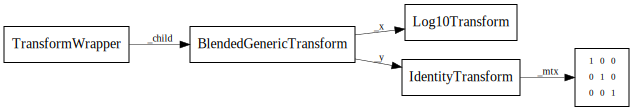

In [19]:
#%fig=X轴为对数坐标时的transScale对象的内部结构
ax.set_xscale("log") # 将X轴改为对数坐标
%dot GraphvizMPLTransform.graphviz(ax.transScale)
ax.set_xscale("linear") # 将X轴改为线性坐标

### 制作阴影效果

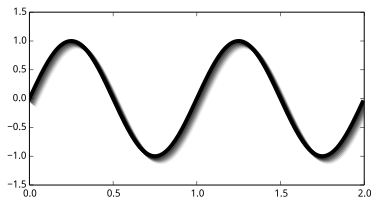

In [29]:
#%fig=使用坐标变换绘制的带阴影的曲线
fig, ax = plt.subplots()
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)

N = 7 # 阴影的条数
for i in range(N, 0, -1):
    offset = transforms.ScaledTranslation(i, -i, transforms.IdentityTransform()) #❶
    shadow_trans = plt.gca().transData + offset #❷
    ax.plot(x,y,linewidth=4,color="black", 
        transform=shadow_trans,  #❸
        alpha=(N-i)/2.0/N)
    
ax.plot(x,y,linewidth=4,color='black')    
ax.set_ylim((-1.5, 1.5));

In [30]:
offset.transform((0,0)) # 将(0,0)变换为(1,-1)

array([ 1., -1.])

In [31]:
print((ax.transData.transform((0,0)))) # 对(0,0)进行数据坐标变换
print((shadow_trans.transform((0,0)))) # 对(0,0)进行数据坐标变换和偏移变换

[  60.  120.]
[  61.  119.]


### 添加注释

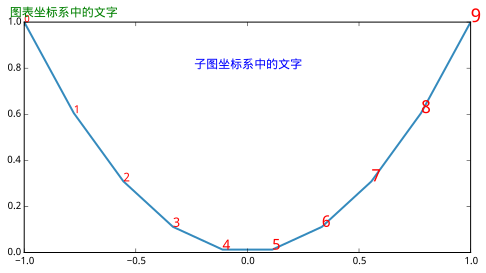

In [106]:
#%fig=三个坐标系中的文字
x = np.linspace(-1,1,10)
y = x**2

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x,y)

for i, (_x, _y) in enumerate(zip(x, y)):
    ax.text(_x, _y, str(i), color="red", fontsize=i+10) #❶

ax.text(0.5, 0.8, "子图坐标系中的文字", color="blue", ha="center", 
    transform=ax.transAxes) #❷
    
plt.figtext(0.1, 0.92, "图表坐标系中的文字", color="green") #❸;